In [101]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
import datetime as datetime
import matplotlib.colors as mcolors # 색상표


if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False


종목 코드와 종목명 가져오기

볼린저밴드를 그리려면 종목의 일자별 주가 데이터가 있어야 함.

In [49]:
stock_list = pd.DataFrame({'종목코드': stock.get_market_ticker_list(market="ALL")})
#map 이라는 거... 아주 유용하구만?
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [51]:
#오 loc로 이런식으로 조건식, 컬럼명 해서 가져올 수 있음
ticker = stock_list.loc[stock_list['종목명']=='천보','종목코드']
df = stock.get_market_ohlcv_by_date(fromdate="20200101",todate="20210528",ticker=ticker)

In [52]:
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-02,62600,63400,61400,63300,129106
2020-01-03,63300,63700,61900,62900,94871
2020-01-06,61600,63300,60500,62600,87796
2020-01-07,63500,63600,61600,61800,77852
2020-01-08,61500,61500,59600,59900,102407
...,...,...,...,...,...
2021-05-24,167200,167400,165000,165800,24922
2021-05-25,167000,167700,166100,167000,24553
2021-05-26,167100,168100,165500,167000,25903


In [58]:
#20일 이동평균 moving average MA
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()
df['20일 이동표준편차'] = df['종가'].rolling(window=20).std()
df['상단밴드'] = df['20일 이동평균'] + 2*df['20일 이동표준편차']
df['하단밴드'] = df['20일 이동평균'] - 2*df['20일 이동표준편차']
df = df[19:]
df

,시가,고가,저가,종가,거래량,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드
날짜,,,,,,,,,
2020-03-23,39200,43150,39100,40600,128291,61725.0,11261.432787,84247.865574,39202.134426
2020-03-24,42850,47400,41800,47400,194718,60395.0,11306.098727,83007.197454,37782.802546
2020-03-25,49050,53500,49050,51400,193510,59335.0,11093.396566,81521.793132,37148.206868
2020-03-26,52200,53700,50100,51600,142238,58410.0,10918.448897,80246.897794,36573.102206
2020-03-27,53900,54000,49950,51900,134489,57695.0,10849.471246,79393.942492,35996.057508
...,...,...,...,...,...,...,...,...,...
2021-05-24,167200,167400,165000,165800,24922,172555.0,10047.753087,192650.506175,152459.493825
2021-05-25,167000,167700,166100,167000,24553,171315.0,9026.060223,189367.120447,153262.879553
2021-05-26,167100,168100,165500,167000,25903,170025.0,7510.194825,185045.389651,155004.610349


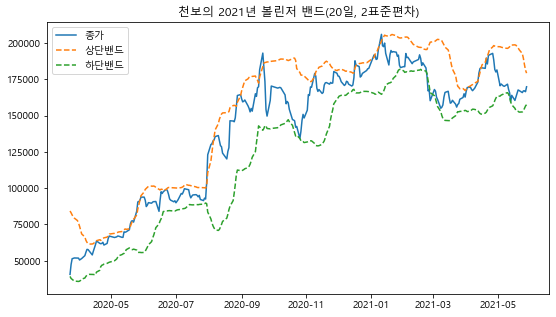

In [60]:
plt.figure(figsize=(9,5))
plt.title(f'천보의 2021년 볼린저 밴드(20일, 2표준편차)')
plt.plot(df.index, df['종가'], label ='종가' )
plt.plot(df.index, df['상단밴드'], linestyle = 'dashed', label='상단밴드')
plt.plot(df.index, df['하단밴드'], linestyle = 'dashed', label='하단밴드')
plt.legend(loc='best')
plt.show()

In [65]:
#이번엔 와이지
ticker = stock_list.loc[stock_list['종목명']=='와이지엔터테인먼트','종목코드']
df = stock.get_market_ohlcv_by_date(fromdate="20200101", todate="20210528", ticker=ticker)
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-02,27250,27700,26500,27500,224040
2020-01-03,27600,28800,26600,28400,563162
2020-01-06,28400,30500,28000,30000,1141917
2020-01-07,30500,31200,29500,30750,634303
2020-01-08,30750,30950,29400,30550,457119
...,...,...,...,...,...
2021-05-24,48000,49450,47600,49050,506747
2021-05-25,49100,50800,48600,50000,538883
2021-05-26,50100,50600,49100,50000,319239


In [66]:
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()
df['20일 이동표준편차'] = df['종가'].rolling(window=20).std()
df['상단밴드'] = df['20일 이동평균'] + 2*df['20일 이동표준편차']
df['하단밴드'] = df['20일 이동평균'] - 2*df['20일 이동표준편차']
df = df[19:]
df

,시가,고가,저가,종가,거래량,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드
날짜,,,,,,,,,
2020-01-31,33000,33350,31600,31600,242343,32490.0,2296.370133,37082.740267,27897.259733
2020-02-03,30400,34250,30400,33950,454352,32812.5,1991.354670,36795.209340,28829.790660
2020-02-04,33650,35050,33250,34200,261373,33102.5,1718.588390,36539.676779,29665.323221
2020-02-05,34250,34700,33400,33500,175969,33277.5,1556.605196,36390.710392,30164.289608
2020-02-06,33950,34350,33000,33650,193934,33422.5,1439.432911,36301.365822,30543.634178
...,...,...,...,...,...,...,...,...,...
2021-05-24,48000,49450,47600,49050,506747,44007.5,2637.396793,49282.293585,38732.706415
2021-05-25,49100,50800,48600,50000,538883,44315.0,2957.199066,50229.398132,38400.601868
2021-05-26,50100,50600,49100,50000,319239,44590.0,3219.414788,51028.829577,38151.170423


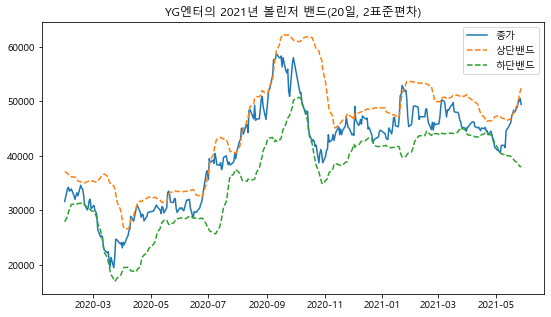

In [67]:
plt.figure(figsize=(9,5))
plt.title(f'YG엔터의 2021년 볼린저 밴드(20일, 2표준편차)')
plt.plot(df.index, df['종가'], label ='종가' )
plt.plot(df.index, df['상단밴드'], linestyle = 'dashed', label='상단밴드')
plt.plot(df.index, df['하단밴드'], linestyle = 'dashed', label='하단밴드')
plt.legend(loc='best')
plt.show()

In [70]:
#assign은 열을 새로 만드는 메서드, action, state라는 공백 열을 추가하겟다는 말
trading_book = df.copy().assign(신호='', 상태='').reset_index()
trading_book

,날짜,시가,고가,저가,종가,거래량,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드,action,state
0,2020-01-31,33000,33350,31600,31600,242343,32490.0,2296.370133,37082.740267,27897.259733,,
1,2020-02-03,30400,34250,30400,33950,454352,32812.5,1991.354670,36795.209340,28829.790660,,
2,2020-02-04,33650,35050,33250,34200,261373,33102.5,1718.588390,36539.676779,29665.323221,,
3,2020-02-05,34250,34700,33400,33500,175969,33277.5,1556.605196,36390.710392,30164.289608,,
4,2020-02-06,33950,34350,33000,33650,193934,33422.5,1439.432911,36301.365822,30543.634178,,
...,...,...,...,...,...,...,...,...,...,...,...,...
324,2021-05-24,48000,49450,47600,49050,506747,44007.5,2637.396793,49282.293585,38732.706415,,
325,2021-05-25,49100,50800,48600,50000,538883,44315.0,2957.199066,50229.398132,38400.601868,,
326,2021-05-26,50100,50600,49100,50000,319239,44590.0,3219.414788,51028.829577,38151.170423,,
327,2021-05-27,50400,50500,48600,50500,350836,44922.5,3472.428052,51867.356105,37977.643895,,


In [73]:
for i in range(len(trading_book)):
    #초기값 설정
    if i==0:
        #종가가 하단 밴드 이하이면 매수
        if trading_book.loc[i, '종가'] <= trading_book.loc[i, '하단밴드']:
            trading_book.loc[i, '신호'] = 'BUY' 
            trading_book.loc[i, '상태'] = '보유중'
        #이외에는 아무것도 안하기 , 걍 코드 안써도 되는 거 아닌감..
        else:
            trading_book.loc[i, '신호'] = ''
            trading_book.loc[i, '상태'] = ''
    else:
        #종가가 하단 밴드 이하일때
        if trading_book.loc[i, '종가'] <= trading_book.loc[i, '하단밴드']:
            #이전 상태가 보유중이 아니면 매수 ㅇㅎ 안에 꺼를 이런식으로 판단..하는군
            if trading_book.loc[i-1, '상태'] not in ['보유중']:
                trading_book.loc[i, '신호'] = 'BUY' 
                trading_book.loc[i, '상태'] = '보유중'
            #이전 상태가 보유중이면 그대로 보유
            elif trading_book.loc[i-1, '상태'] in ['보유중']:
                trading_book.loc[i, '신호'] = 'HOLD' 
                trading_book.loc[i, '상태'] = '보유중'
        
        #종가가 상단밴드 이상일 때
        elif trading_book.loc[i, '종가'] >= trading_book.loc[i, '상단밴드']:
            #보유중이 아니면 그대로 있기
            if trading_book.loc[i-1, '상태'] not in ['보유중']:
                trading_book.loc[i, '신호'] = 'HOLD'
            #보유중이면 매도
            elif trading_book.loc[i-1, '상태'] in ['보유중']:
                trading_book.loc[i, '신호'] = 'SELL' 
                trading_book.loc[i, '상태'] = ''

        #이외에는 아무것도 하지않고 이전 상태 유지
        else:
            trading_book.loc[i, '신호'] = ''
            trading_book.loc[i, '상태'] = trading_book.loc[i-1]['상태']

In [74]:
trading_book

,날짜,시가,고가,저가,종가,거래량,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드,action,state,신호,상태
0,2020-01-31,33000,33350,31600,31600,242343,32490.0,2296.370133,37082.740267,27897.259733,,,,
1,2020-02-03,30400,34250,30400,33950,454352,32812.5,1991.354670,36795.209340,28829.790660,,,,
2,2020-02-04,33650,35050,33250,34200,261373,33102.5,1718.588390,36539.676779,29665.323221,,,,
3,2020-02-05,34250,34700,33400,33500,175969,33277.5,1556.605196,36390.710392,30164.289608,,,,
4,2020-02-06,33950,34350,33000,33650,193934,33422.5,1439.432911,36301.365822,30543.634178,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2021-05-24,48000,49450,47600,49050,506747,44007.5,2637.396793,49282.293585,38732.706415,,,,NaN
325,2021-05-25,49100,50800,48600,50000,538883,44315.0,2957.199066,50229.398132,38400.601868,,,,NaN
326,2021-05-26,50100,50600,49100,50000,319239,44590.0,3219.414788,51028.829577,38151.170423,,,,NaN
327,2021-05-27,50400,50500,48600,50500,350836,44922.5,3472.428052,51867.356105,37977.643895,,,,NaN


In [77]:
#index순서 초기화는 굳이 안해도 됨. 
report = trading_book.loc[trading_book['신호'].isin(['BUY', 'SELL']), ['날짜', '종가', '상단밴드', '하단밴드', '신호', '상태']].reset_index(drop=True)

In [78]:
report

,날짜,종가,상단밴드,하단밴드,신호,상태
0,2020-02-24,30050,35237.078689,30477.921311,BUY,보유중
1,2020-04-10,28900,28310.107999,18864.892001,SELL,
2,2020-06-15,28550,33818.567595,28616.432405,BUY,보유중
3,2020-06-26,33850,33308.382553,28296.617447,SELL,
4,2020-10-12,47600,61820.796383,48199.203617,BUY,보유중
5,2020-12-03,49050,47665.088345,41539.911655,SELL,
6,2020-12-22,42400,48655.042883,42479.957117,BUY,보유중
7,2021-01-20,51000,48861.167998,40658.832002,SELL,
8,2021-04-23,43850,46397.196696,43912.803304,BUY,보유중
9,2021-05-18,47250,47239.802192,39665.197808,SELL,


In [85]:
#종가 다음날에 사야 하니깐 일단 한칸씩 땡기고, 신호가 SELL이 아닌것들(보유중인거)의 가격은 nan으로 바꾼다.이땐 무조건 사서 그런가 .. ㅇㅅㅇ 
#아 일단 신호가 발생한 날은 무조건 사야 해서 그런가 .. 보다 
report = report.assign(구매가 = report['종가'].shift(1))
report.loc[~report['신호'].isin(['SELL']), '구매가'] = np.nan
report

,날짜,종가,상단밴드,하단밴드,신호,상태,구매가
0,2020-02-24,30050,35237.078689,30477.921311,BUY,보유중,NaN
1,2020-04-10,28900,28310.107999,18864.892001,SELL,,30050.0
2,2020-06-15,28550,33818.567595,28616.432405,BUY,보유중,NaN
3,2020-06-26,33850,33308.382553,28296.617447,SELL,,28550.0
4,2020-10-12,47600,61820.796383,48199.203617,BUY,보유중,NaN
5,2020-12-03,49050,47665.088345,41539.911655,SELL,,47600.0
6,2020-12-22,42400,48655.042883,42479.957117,BUY,보유중,NaN
7,2021-01-20,51000,48861.167998,40658.832002,SELL,,42400.0
8,2021-04-23,43850,46397.196696,43912.803304,BUY,보유중,NaN
9,2021-05-18,47250,47239.802192,39665.197808,SELL,,43850.0


In [86]:
report.loc[report['신호'].isin(['SELL']), 'yield(%)'] = round((report['종가']/report['구매가']-1)*100, 2)

In [87]:
#오늘의 종가 대비 얼만큼 수익률을 올렷는지 계산해주는 듯 
report

,날짜,종가,상단밴드,하단밴드,신호,상태,구매가,yield(%)
0,2020-02-24,30050,35237.078689,30477.921311,BUY,보유중,NaN,NaN
1,2020-04-10,28900,28310.107999,18864.892001,SELL,,30050.0,-3.83
2,2020-06-15,28550,33818.567595,28616.432405,BUY,보유중,NaN,NaN
3,2020-06-26,33850,33308.382553,28296.617447,SELL,,28550.0,18.56
4,2020-10-12,47600,61820.796383,48199.203617,BUY,보유중,NaN,NaN
5,2020-12-03,49050,47665.088345,41539.911655,SELL,,47600.0,3.05
6,2020-12-22,42400,48655.042883,42479.957117,BUY,보유중,NaN,NaN
7,2021-01-20,51000,48861.167998,40658.832002,SELL,,42400.0,20.28
8,2021-04-23,43850,46397.196696,43912.803304,BUY,보유중,NaN,NaN
9,2021-05-18,47250,47239.802192,39665.197808,SELL,,43850.0,7.75


In [96]:
#이번엔 두산 중공업
ticker = stock_list.loc[stock_list['종목명']=='두산중공업', '종목코드']
today = datetime.datetime.now().strftime("%Y%m%d")
df = stock.get_market_ohlcv_by_date(fromdate="20200101", todate=today, ticker=ticker)
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-02,5263,5327,5199,5264,732351
2020-01-03,5263,5309,5217,5254,761035
2020-01-06,5208,5245,5070,5098,1346655
2020-01-07,5144,5180,5070,5080,675755
2020-01-08,5052,5061,4822,4878,1736784
...,...,...,...,...,...
2021-10-01,20350,20450,19600,19700,5347469
2021-10-05,19350,20050,19250,19500,4218010
2021-10-06,19700,19850,18050,18150,8006011


In [98]:
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()
df['20일 이동표준편차'] = df['종가'].rolling(window=20).std()
df['상단밴드'] = df['20일 이동평균'] + 2*df['20일 이동표준편차']
df['하단밴드'] = df['20일 이동평균'] - 2*df['20일 이동표준편차']
# %b 주가가 볼린저밴드 어디에 위치해 있는지 나타내는 지표
# 종가가 상단밴드를 태그하면 1, 중간밴드를 태그하면 0.5, 하단밴드를 태그하면 0
# 종가가 상단밴드 위에 있으면 %b >1, 종가가 하단밴드 아래에 있으면 0보다 작아짐. 
df['PB']= (df['종가']-df['하단밴드']) / (df['상단밴드']-df['하단밴드'])
df['밴드폭']= (df['상단밴드']-df['하단밴드'])/df['20일 이동평균']
df = df[19:]
df

C:\Users\ddh10\AppData\Local\Temp/ipykernel_14624/2441033288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['20일 이동평균'] = df['종가'].rolling(window=20).mean()
C:\Users\ddh10\AppData\Local\Temp/ipykernel_14624/2441033288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['20일 이동표준편차'] = df['종가'].rolling(window=20).std()
C:\Users\ddh10\AppData\Local\Temp/ipykernel_14624/2441033288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,시가,고가,저가,종가,거래량,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드,PB,밴드폭
날짜,,,,,,,,,,,
2020-02-27,4730,4795,4675,4694,1038932,5035.35,205.514316,5446.378633,4624.321367,0.084761,0.163257
2020-02-28,4620,4657,4551,4602,1945522,5014.20,227.251912,5468.703824,4559.696176,0.046538,0.181287
2020-03-02,4593,4629,4501,4552,1481752,4994.70,249.424200,5493.548400,4495.851600,0.056278,0.199751
2020-03-03,4657,4675,4574,4584,915343,4974.05,265.783544,5505.617087,4442.482913,0.133113,0.213736
2020-03-04,4565,4602,4560,4584,776606,4952.45,279.400199,5511.250397,4393.649603,0.170321,0.225666
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,20350,20450,19600,19700,5347469,21050.00,628.490254,22306.980509,19793.019491,-0.037001,0.119428
2021-10-05,19350,20050,19250,19500,4218010,20930.00,684.297565,22298.595131,19561.404869,-0.022434,0.130778
2021-10-06,19700,19850,18050,18150,8006011,20772.50,917.444248,22607.388495,18937.611505,-0.214621,0.176665


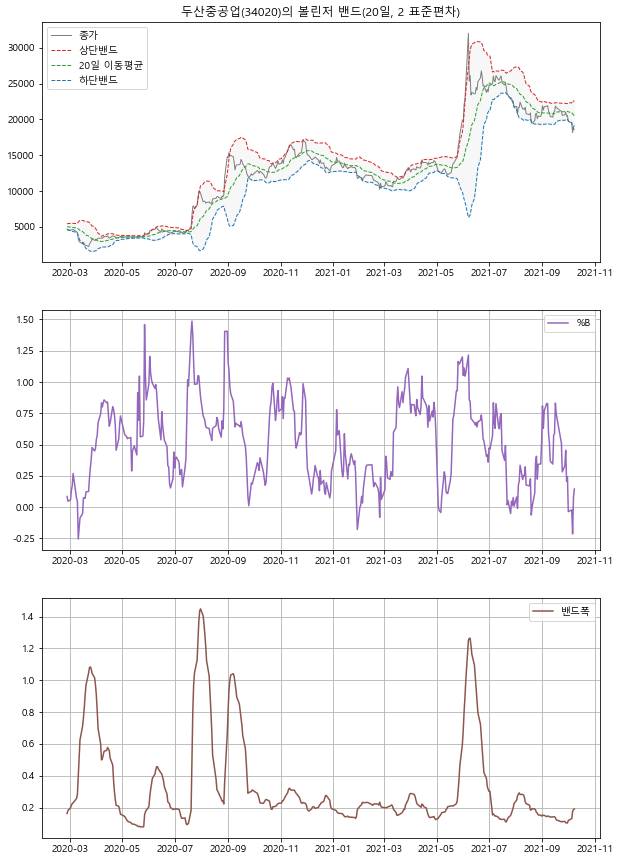

In [117]:
#이쁜 색
tab_cols = mcolors.TABLEAU_COLORS

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(df.index, df['종가'], color=tab_cols['tab:gray'], linewidth=1, label='종가')
plt.plot(df.index, df['상단밴드'], color=tab_cols['tab:red'], linestyle='dashed', linewidth=1, label='상단밴드')
plt.plot(df.index, df['20일 이동평균'], color=tab_cols['tab:green'], linestyle='dashed', linewidth=1, label='20일 이동평균')
plt.plot(df.index, df['하단밴드'], color=tab_cols['tab:blue'], linestyle='dashed', linewidth=1, label='하단밴드')
plt.fill_between(df.index, df['상단밴드'], df['하단밴드'], color='0.97')
plt.title(f'두산중공업({int(ticker.values)})의 볼린저 밴드(20일, 2 표준편차)')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], color=tab_cols['tab:purple'], label='%B')
#격자선
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(df.index, df['밴드폭'], color=tab_cols['tab:brown'], label='밴드폭')
plt.grid(True)
plt.legend(loc='best')

plt.show()

최근 두산 중공업은 주가가 미미
밴드폭은 상승 추세(밴드 폭이 좁아지면 주가 안정기, 변동폭이 클수록 넓어진다)
%b값 내려감(-, 음수... ) 


In [493]:
#한화솔루션~
stock_nm = '한화솔루션'
ticker = stock_list.loc[stock_list['종목명']==stock_nm,'종목코드']
today = datetime.datetime.today().strftime("%Y%m%d")
df = stock.get_market_ohlcv_by_date(fromdate="20200101", todate = today, ticker=ticker)
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-02,18223,18271,17932,17932,417072
2020-01-03,18029,18756,17932,18611,865038
2020-01-06,18465,18562,18029,18029,625812
2020-01-07,18223,18853,18126,18659,978306
2020-01-08,18271,18416,17544,17884,1216990
...,...,...,...,...,...
2021-10-01,44950,44950,42800,42950,1600589
2021-10-05,43450,44550,42850,43950,2334833
2021-10-06,44550,45850,43300,43450,3759193


In [462]:
#10일(거래일 기준 2주동안)의 현금흐름 지표 MFI(money flow index)를 구하는 코드
#중심가격은 TP typical price 라고 함
#positive money flow, negative money flow
df['중심가격'] = (df['고가']+df['저가']+df['종가'])/3
df['긍정현금흐름'] = 0
df['부정현금흐름'] = 0
#길이보다 하나 적게 하는 거는 어차피 막날껀 필요없어서? 인듯
for i in range(len(df['종가'])-1):
    #당일의 중심가격이 전일의 중심가격보다 크면 긍정적 현금흐름
    if df['중심가격'].values[i] < df['중심가격'].values[i+1]:
        df['긍정현금흐름'].values[i+1] = df['중심가격'].values[i+1]*df['거래량'].values[i+1]
        df['부정현금흐름'].values[i+1] = 0
    #당일의 중심가격이 전일의 중심가격보다 작거나 같으면 부정적 현금흐름
    else:
        df['부정현금흐름'].values[i+1] = df['중심가격'].values[i+1]*df['거래량'].values[i+1]
        df['긍정현금흐름'].values[i+1] = 0

df['현금흐름비율'] = df['긍정현금흐름'].rolling(window=10).sum()/df['부정현금흐름'].rolling(window=10).sum()
df['MFI'] = 100-100/(1+df['현금흐름비율'])

In [463]:
#두 현금흐름의 합을 구해서 비율을 구하나, 평균을 구해서 비율을 구하나 똑같네
df['긍정현금흐름'].rolling(window=10).sum()/df['부정현금흐름'].rolling(window=10).sum()

날짜
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-10-01    1.379154
2021-10-05    1.958033
2021-10-06    3.008395
2021-10-07    2.046323
2021-10-08    1.922356
Length: 438, dtype: float64

In [464]:
df['긍정현금흐름'].rolling(window=10).mean()/df['부정현금흐름'].rolling(window=10).mean()

날짜
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-10-01    1.379154
2021-10-05    1.958033
2021-10-06    3.008395
2021-10-07    2.046323
2021-10-08    1.922356
Length: 438, dtype: float64

In [465]:
df

,시가,고가,저가,종가,거래량,중심가격,긍정현금흐름,부정현금흐름,현금흐름비율,MFI
날짜,,,,,,,,,,
2020-01-02,18223,18271,17932,17932,417072,18045.000000,0,0,NaN,NaN
2020-01-03,18029,18756,17932,18611,865038,18433.000000,15945245454,0,NaN,NaN
2020-01-06,18465,18562,18029,18029,625812,18206.666667,0,11393950480,NaN,NaN
2020-01-07,18223,18853,18126,18659,978306,18546.000000,18143663076,0,NaN,NaN
2020-01-08,18271,18416,17544,17884,1216990,17948.000000,0,21842536520,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-01,44950,44950,42800,42950,1600589,43566.666667,0,69732327433,1.379154,57.968254
2021-10-05,43450,44550,42850,43950,2334833,43783.333333,102226771516,0,1.958033,66.193751
2021-10-06,44550,45850,43300,43450,3759193,44200.000000,166156330600,0,3.008395,75.052358


In [466]:
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()
df['20일 이동표준편차'] = df['종가'].rolling(window=20).std()
df['상단밴드'] = df['20일 이동평균'] + 2*df['20일 이동표준편차']
df['하단밴드'] = df['20일 이동평균'] - 2*df['20일 이동표준편차']
# %b 주가가 볼린저밴드 어디에 위치해 있는지 나타내는 지표
# 종가가 상단밴드를 태그하면 1, 중간밴드를 태그하면 0.5, 하단밴드를 태그하면 0
# 종가가 상단밴드 위에 있으면 %b >1, 종가가 하단밴드 아래에 있으면 0보다 작아짐. 
df['PB']= (df['종가']-df['하단밴드']) / (df['상단밴드']-df['하단밴드'])
df['밴드폭']= (df['상단밴드']-df['하단밴드'])/df['20일 이동평균']
df = df[19:]
df

,시가,고가,저가,종가,거래량,중심가격,긍정현금흐름,부정현금흐름,현금흐름비율,MFI,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드,PB,밴드폭
날짜,,,,,,,,,,,,,,,,
2020-01-31,16866,17011,16332,16333,665423,16558.666667,0,11018517649,0.289955,22.477906,18477.40,935.205376,20347.810751,16606.989249,-0.073243,0.202454
2020-02-03,15945,16478,15654,16284,800729,16138.666667,0,12922698421,0.288111,22.366946,18395.00,1051.197813,20497.395626,16292.604374,-0.002046,0.228583
2020-02-04,16478,16720,16332,16624,694116,16558.666667,11493635472,0,0.288733,22.404436,18295.65,1121.270345,20538.190690,16053.109310,0.127287,0.245145
2020-02-05,16914,16962,16429,16672,673541,16687.666667,11239827694,0,0.229422,18.660948,18227.80,1177.883052,20583.566104,15872.033896,0.169789,0.258481
2020-02-06,16866,18126,16817,17981,1491394,17641.333333,26310178685,0,0.544508,35.254445,18193.90,1174.571676,20543.043351,15844.756649,0.454686,0.258234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,44950,44950,42800,42950,1600589,43566.666667,0,69732327433,1.379154,57.968254,42012.50,1546.717662,45105.935324,38919.064676,0.651531,0.147263
2021-10-05,43450,44550,42850,43950,2334833,43783.333333,102226771516,0,1.958033,66.193751,42230.00,1494.586723,45219.173447,39240.826553,0.787705,0.141566
2021-10-06,44550,45850,43300,43450,3759193,44200.000000,166156330600,0,3.008395,75.052358,42425.00,1376.255408,45177.510816,39672.489184,0.686194,0.129759


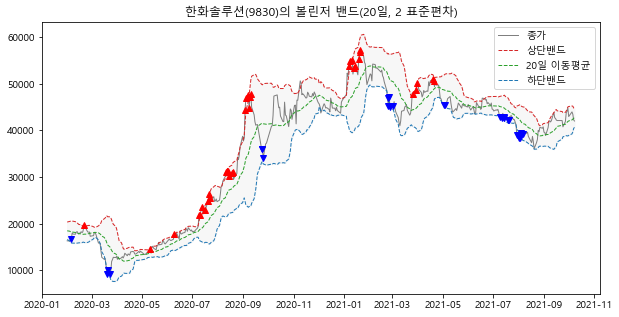

In [467]:
#이쁜 색
tab_cols = mcolors.TABLEAU_COLORS

plt.figure(figsize=(10,5))
plt.plot(df.index, df['종가'], color=tab_cols['tab:gray'], linewidth=1, label='종가')
plt.plot(df.index, df['상단밴드'], color=tab_cols['tab:red'], linestyle='dashed', linewidth=1, label='상단밴드')
plt.plot(df.index, df['20일 이동평균'], color=tab_cols['tab:green'], linestyle='dashed', linewidth=1, label='20일 이동평균')
plt.plot(df.index, df['하단밴드'], color=tab_cols['tab:blue'], linestyle='dashed', linewidth=1, label='하단밴드')
plt.fill_between(df.index, df['상단밴드'], df['하단밴드'], color='0.97')
plt.title(f'{stock_nm}({int(ticker.values)})의 볼린저 밴드(20일, 2 표준편차)')


#날짜 수만큼 ㄱ
for i in range(len(df)):
    #%b > 0.8(볼린저 밴드 내부 약 위쪽으로 80%이상 위치) MFI가 80이상이면 매수
    if df['PB'].values[i]>0.8 and df['MFI'].values[i] > 80:
        plt.plot(df.index.values[i], df['종가'].values[i], 'r^')
    elif df['PB'].values[i]<0.2 and df['MFI'].values[i] <20:
        plt.plot(df.index.values[i], df['종가'].values[i], 'bv')
        
plt.legend(loc='best')
plt.show()

In [468]:
BUY = []
SELL =[]
자본금 = 100_000_000
주식수 = 0
이익 = 0
#수수료가 있으면 한번 매수단위에 따라 이익이 달라짐. 
수수료 = 0.35

In [469]:
for i in range(len(df)):
    if df['PB'].values[i]>0.8 and df['MFI'].values[i] > 80:
        BUY.append(df.index.values[i])
        자본금 -= df['종가'].values[i]
        주식수 += 1
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매수가: {df['종가'].values[i]} (원)"
              f"| 체결수량 : 1 | 총 {주식수} 주")
    if df['PB'].values[i]<0.2 and df['MFI'].values[i]<20:
        SELL.append(df.index.values[i])
        if 주식수 == 0:
            continue
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {df['종가'].values[i]} (원) "
              f"| 체결수량 : 1 | 총 {주식수} 주")
        자본금 += df['종가'].values[i] * 주식수
        주식수 = 0
    if i == len(df)-1:
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {df['종가'].values[i]} (원)"
              f"| 체결수량 : 1 | 총 {주식수} 주")
        자본금 += df['종가'].values[i] * 주식수
        주식수 = 0 
        이익 = 자본금 - 100_000_000
        print(f"총이익: {이익} (원)" )

[2020-02-21] 체결완료 - 매수가: 19677 (원)| 체결수량 : 1 | 총 1 주
[2020-03-19] 체결완료 - 매도가: 9208 (원) | 체결수량 : 1 | 총 1 주
[2020-05-11] 체결완료 - 매수가: 14491 (원)| 체결수량 : 1 | 총 1 주
[2020-06-09] 체결완료 - 매수가: 17787 (원)| 체결수량 : 1 | 총 2 주
[2020-07-09] 체결완료 - 매수가: 21761 (원)| 체결수량 : 1 | 총 3 주
[2020-07-10] 체결완료 - 매수가: 21906 (원)| 체결수량 : 1 | 총 4 주
[2020-07-13] 체결완료 - 매수가: 23554 (원)| 체결수량 : 1 | 총 5 주
[2020-07-16] 체결완료 - 매수가: 22973 (원)| 체결수량 : 1 | 총 6 주
[2020-07-20] 체결완료 - 매수가: 24766 (원)| 체결수량 : 1 | 총 7 주
[2020-07-21] 체결완료 - 매수가: 26268 (원)| 체결수량 : 1 | 총 8 주
[2020-07-22] 체결완료 - 매수가: 25590 (원)| 체결수량 : 1 | 총 9 주
[2020-08-11] 체결완료 - 매수가: 31067 (원)| 체결수량 : 1 | 총 10 주
[2020-08-12] 체결완료 - 매수가: 31357 (원)| 체결수량 : 1 | 총 11 주
[2020-08-13] 체결완료 - 매수가: 31309 (원)| 체결수량 : 1 | 총 12 주
[2020-08-14] 체결완료 - 매수가: 30146 (원)| 체결수량 : 1 | 총 13 주
[2020-08-18] 체결완료 - 매수가: 30824 (원)| 체결수량 : 1 | 총 14 주
[2020-08-19] 체결완료 - 매수가: 31163 (원)| 체결수량 : 1 | 총 15 주
[2020-09-03] 체결완료 - 매수가: 44298 (원)| 체결수량 : 1 | 총 16 주
[2020-09-04] 체결완료 - 매수가: 47012 (원)| 체결수

In [470]:
BUY = []
SELL =[]
df['자본금'] = np.nan
df['자본금'].values[0] = 100_000_000
자본금 = 100_000_000
주식수 = 0
이익 = 0
수수료 = 0.35


for i in range(len(df)):
    if df['PB'].values[i]>0.8:
        BUY.append(df.index.values[i])
        자본금 -= df['종가'].values[i]*(1+수수료)
        df['자본금'].values[i] = 자본금
        주식수 += 1
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매수가: {df['종가'].values[i]} (원)"
              f"| 체결수량 : 1 | 총 {주식수} 주")
    if df['PB'].values[i]<0.4:
        SELL.append(df.index.values[i])
        if 주식수 == 0:
            continue
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {df['종가'].values[i]} (원)"
              f"| 체결수량 : {주식수} 주")
        자본금 += df['종가'].values[i]*주식수*(1-수수료)
        df['자본금'].values[i] = 자본금
        주식수 = 0
    if i == (len(df)-1):
        print(f"[{pd.to_datetime(df.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {df['종가'].values[i]} (원)"
              f"| 체결수량 : {주식수} 주")
        자본금 += df['종가'].values[i] * 주식수*(1-수수료)
        df['자본금'].values[i] = 자본금
        주식수 = 0 

이익 = 자본금 - 100_000_000
print(f"총이익: {이익} (원)" )

[2020-02-20] 체결완료 - 매수가: 19144 (원)| 체결수량 : 1 | 총 1 주
[2020-02-21] 체결완료 - 매수가: 19677 (원)| 체결수량 : 1 | 총 2 주
[2020-02-28] 체결완료 - 매도가: 17302 (원)| 체결수량 : 2 주
[2020-04-10] 체결완료 - 매수가: 13667 (원)| 체결수량 : 1 | 총 1 주
[2020-04-17] 체결완료 - 매수가: 13958 (원)| 체결수량 : 1 | 총 2 주
[2020-04-20] 체결완료 - 매수가: 14055 (원)| 체결수량 : 1 | 총 3 주
[2020-04-21] 체결완료 - 매수가: 13958 (원)| 체결수량 : 1 | 총 4 주
[2020-04-27] 체결완료 - 매수가: 14055 (원)| 체결수량 : 1 | 총 5 주
[2020-04-29] 체결완료 - 매수가: 14104 (원)| 체결수량 : 1 | 총 6 주
[2020-05-11] 체결완료 - 매수가: 14491 (원)| 체결수량 : 1 | 총 7 주
[2020-05-12] 체결완료 - 매수가: 15073 (원)| 체결수량 : 1 | 총 8 주
[2020-05-13] 체결완료 - 매수가: 14976 (원)| 체결수량 : 1 | 총 9 주
[2020-05-14] 체결완료 - 매수가: 15170 (원)| 체결수량 : 1 | 총 10 주
[2020-05-15] 체결완료 - 매수가: 14734 (원)| 체결수량 : 1 | 총 11 주
[2020-05-19] 체결완료 - 매수가: 15267 (원)| 체결수량 : 1 | 총 12 주
[2020-05-20] 체결완료 - 매수가: 15267 (원)| 체결수량 : 1 | 총 13 주
[2020-05-21] 체결완료 - 매수가: 15994 (원)| 체결수량 : 1 | 총 14 주
[2020-05-22] 체결완료 - 매수가: 15461 (원)| 체결수량 : 1 | 총 15 주
[2020-05-25] 체결완료 - 매수가: 15606 (원)| 체결수량 : 1 |

C:\Users\ddh10\AppData\Local\Temp/ipykernel_14624/1154133484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['자본금'] = np.nan


In [473]:
df = df.fillna(method='ffill')
df

,시가,고가,저가,종가,거래량,중심가격,긍정현금흐름,부정현금흐름,현금흐름비율,MFI,20일 이동평균,20일 이동표준편차,상단밴드,하단밴드,PB,밴드폭,자본금
날짜,,,,,,,,,,,,,,,,,
2020-01-31,16866,17011,16332,16333,665423,16558.666667,0,11018517649,0.289955,22.477906,18477.40,935.205376,20347.810751,16606.989249,-0.073243,0.202454,100000000.0
2020-02-03,15945,16478,15654,16284,800729,16138.666667,0,12922698421,0.288111,22.366946,18395.00,1051.197813,20497.395626,16292.604374,-0.002046,0.228583,100000000.0
2020-02-04,16478,16720,16332,16624,694116,16558.666667,11493635472,0,0.288733,22.404436,18295.65,1121.270345,20538.190690,16053.109310,0.127287,0.245145,100000000.0
2020-02-05,16914,16962,16429,16672,673541,16687.666667,11239827694,0,0.229422,18.660948,18227.80,1177.883052,20583.566104,15872.033896,0.169789,0.258481,100000000.0
2020-02-06,16866,18126,16817,17981,1491394,17641.333333,26310178685,0,0.544508,35.254445,18193.90,1174.571676,20543.043351,15844.756649,0.454686,0.258234,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,44950,44950,42800,42950,1600589,43566.666667,0,69732327433,1.379154,57.968254,42012.50,1546.717662,45105.935324,38919.064676,0.651531,0.147263,97594917.6
2021-10-05,43450,44550,42850,43950,2334833,43783.333333,102226771516,0,1.958033,66.193751,42230.00,1494.586723,45219.173447,39240.826553,0.787705,0.141566,97594917.6
2021-10-06,44550,45850,43300,43450,3759193,44200.000000,166156330600,0,3.008395,75.052358,42425.00,1376.255408,45177.510816,39672.489184,0.686194,0.129759,97594917.6


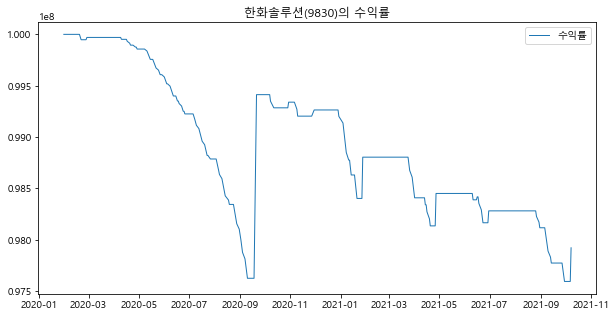

In [475]:
tab_cols = mcolors.TABLEAU_COLORS

plt.figure(figsize=(10,5))
plt.plot(df.index, df['자본금'], color=tab_cols['tab:blue'], linewidth=1, label='수익률')
plt.title(f'{stock_nm}({int(ticker.values)})의 수익률')
plt.legend(loc='best')
plt.show()

In [670]:
ATR = pd.DataFrame()
ATR['변동1'] = abs(df['고가']-df['저가'])
ATR['변동2'] = abs(df['고가']-df.shift(1)['종가'])
ATR['변동3'] = abs(df['저가']-df.shift(1)['종가'])
ATR['ATR'] = ATR.max(axis=1).rolling(window=10).mean()

In [671]:
book = df.copy().assign(ATR=ATR['ATR'])
book = book.dropna()

In [672]:
book['변동성'] = book['ATR']/book['종가']
book['목표가'] = book['종가']+2*book['ATR']
book['손절가'] = book['종가']-1*book['ATR']
book['자본금'] = np.nan
book

,시가,고가,저가,종가,거래량,ATR,변동성,목표가,손절가,자본금
날짜,,,,,,,,,,
2020-01-15,19289,19483,19095,19386,421749,678.4,0.034994,20742.8,18707.6,NaN
2020-01-16,19386,19434,18853,18950,644301,702.6,0.037077,20355.2,18247.4,NaN
2020-01-17,18950,19531,18950,18999,596658,678.3,0.035702,20355.6,18320.7,NaN
2020-01-20,19095,19628,18998,19435,884434,683.1,0.035148,20801.2,18751.9,NaN
2020-01-21,19386,19483,19143,19192,468049,634.7,0.033071,20461.4,18557.3,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-01,44950,44950,42800,42950,1600589,1650.0,0.038417,46250.0,41300.0,NaN
2021-10-05,43450,44550,42850,43950,2334833,1720.0,0.039135,47390.0,42230.0,NaN
2021-10-06,44550,45850,43300,43450,3759193,1870.0,0.043038,47190.0,41580.0,NaN


In [695]:
자본금 = 100_000_000
보유주식수 = 0
이익 = 0
수수료 = 0.35
허용손실 = 0.02
목표가 = book['목표가'].values[0]
손절가 = book['손절가'].values[0]
추매신호 = 0
주식보유액 = 0

for i in range(len(book)):
    if book['종가'].values[i] > 목표가:
        if 추매신호 == 0:
            허용손실 = 0.02
            추매신호 = 1
        else:
            허용손실 = 0.01
        비중 = 허용손실/(book['변동성'].values[i]*2)
        체결수량 = int(자본금*비중/book['종가'].values[i])
        보유주식수 += 체결수량
        자본금 -= int(book['종가'].values[i]*체결수량)
        book['자본금'].values[i] = 자본금
        print(f"[{pd.to_datetime(book.index.values[i]):%Y-%m-%d}] 체결완료 - 매수가: {book['종가'].values[i]} (원)"
              f"| 체결수량 : {체결수량} 주")
        목표가 = book['목표가'].values[i]
        손절가 = book['손절가'].values[i]    
    elif book['종가'].values[i] <= 손절가:
        if 보유주식수 == 0:
            #팔았다고 가정하고 주식 가치 산정 해야 함 
            book['자본금'].values[i] = 자본금
            continue
        print(f"[{pd.to_datetime(book.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {book['종가'].values[i]} (원)"
              f"| 체결수량 : {보유주식수} 주")
        #손절할때는 그당시의 종가, 변동액들을 모두 더해줘야 함
        자본금 += int(book['종가'].values[i]*보유주식수) 
        book['자본금'].values[i] = 자본금        
        보유주식수 = 0
        추매신호 = 0       
        목표가 = book['목표가'].values[i]
        손절가 = book['손절가'].values[i]    
    elif i == (len(book)-1):
        print(f"[{pd.to_datetime(book.index.values[i]):%Y-%m-%d}] 체결완료 - 매도가: {book['종가'].values[i]} (원)"
              f"| 체결수량 : {보유주식수} 주")
        자본금 += int(book['종가'].values[i]*보유주식수) 
        book['자본금'].values[i] = 자본금
        보유주식수 = 0
    else:
        book['자본금'].values[i] = 자본금 + int(book['종가'].values[i]*보유주식수)
        
이익 = 자본금 - 100_000_000
print(f"총이익: {이익} (원)" )

[2020-07-09] 체결완료 - 매수가: 21761 (원)| 체결수량 : 1185 주
[2020-07-13] 체결완료 - 매수가: 23554 (원)| 체결수량 : 384 주
[2020-07-14] 체결완료 - 매도가: 22100 (원)| 체결수량 : 1569 주
[2020-07-20] 체결완료 - 매수가: 24766 (원)| 체결수량 : 691 주
[2020-08-05] 체결완료 - 매수가: 28013 (원)| 체결수량 : 299 주
[2020-08-11] 체결완료 - 매수가: 31067 (원)| 체결수량 : 218 주
[2020-08-27] 체결완료 - 매수가: 34750 (원)| 체결수량 : 143 주
[2020-09-03] 체결완료 - 매수가: 44298 (원)| 체결수량 : 101 주
[2020-09-16] 체결완료 - 매도가: 41099 (원)| 체결수량 : 1452 주
[2020-11-09] 체결완료 - 매수가: 50598 (원)| 체결수량 : 329 주
[2020-11-16] 체결완료 - 매도가: 46915 (원)| 체결수량 : 329 주
[2021-01-08] 체결완료 - 매수가: 54960 (원)| 체결수량 : 416 주
[2021-01-12] 체결완료 - 매도가: 52052 (원)| 체결수량 : 416 주
총이익: 15392545 (원)


In [683]:
book['자본금'] = (1+book['자본금'].pct_change()).cumprod()-1


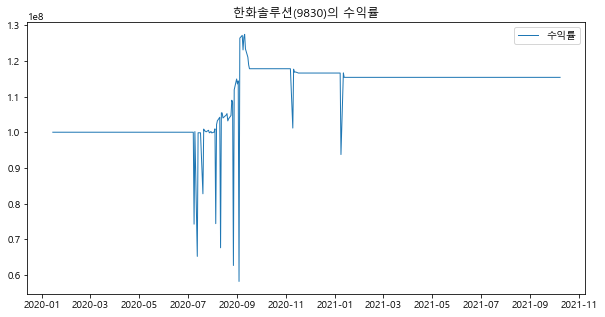

In [676]:
tab_cols = mcolors.TABLEAU_COLORS

plt.figure(figsize=(10,5))
plt.plot(book.index, book['자본금'], color=tab_cols['tab:blue'], linewidth=1, label='수익률')
plt.title(f'{stock_nm}({int(ticker.values)})의 수익률')
plt.legend(loc='best')
plt.show()

In [677]:
import plotly.graph_objects as go

In [696]:
수익 = go.Scatter(
    name = '수익률',
    mode = 'lines',
    x=book.index,
    y=book['자본금'],
    line = dict(color='red', width=1)
)

layout= go.Layout(
    title= '한화솔루션의 수익률',
    yaxis = dict(title='수익률(%)'),
    xaxis = dict(title='날짜'),
    showlegend = True,
    width = 600,
    height = 400
)

go.Figure(data=수익, layout=layout).show()

In [698]:
trade_year = int(len(book)/252)
result = round((book['자본금'].iat[-1]/book['자본금'].iat[0]-1)*100, 3)
trade_year, result

(1, 15.393)

In [700]:
#cagr
total_profit = (book['자본금'].iat[-1]/book['자본금'].iat[0])
cagr = round(total_profit**(1/trade_year)*100, 2)
cagr

115.39

In [704]:
arr_v = np.array(book['자본금'])
peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
peak_upper = np.argmax(arr_v[:peak_lower])
mdd = (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]
mdd

-0.49413543838325713

In [705]:
peak_lower

159

In [706]:
book.index.values[159]

numpy.datetime64('2020-09-03T00:00:00.000000000')

In [707]:
272*403526

109759072

In [ ]:
100881720